#                                            # Project 2 - Statistics Learning - Health Insurance 

Data Description:   The data at hand contains medical costs of people  characterized by certain attributes.  

Domain:   Healthcare  

Context:  Leveraging customer information is paramount for most  businesses. In the case of an insurance company, attributes of  customers like the ones mentioned below can be crucial in  making business decisions. Hence, knowing to explore and  generate value out of such data can be an invaluable skill to  have. 

Attribute Information:  
age​: age of primary beneficiary  
sex​: insurance contractor gender, female, male  
bmi​: Body mass index, providing an understanding of body,  weights that are relatively high or low relative to height,  objective index of body weight (kg / m ^ 2) using the ratio of  height to weight, ideally 18.5 to 24.9  
children​: Number of children covered by health insurance /  Number of dependents  
smoker​: Smoking  
region​: the beneficiary's residential area in the US, northeast,  southeast, southwest, northwest.  
charges​: Individual medical costs billed by health insurance.  

Learning Outcomes:   
● Exploratory Data Analysis  
● Practicing statistics using Python  
● Hypothesis testing   

Objective:  
We want to see if we can dive deep into this data to find some  valuable insights.   

# 1. Importing the necessary libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from scipy import stats
from scipy.stats import chisquare, chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm

# 2. Reading the data as a data frame

In [2]:
Ins = pd.read_csv('insurance.csv')

In [3]:
Ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Performing basic EDA and printing out insights at every step

### a.  Shape of the data

In [4]:
Ins.shape

(1338, 7)

###### The dataset has 1338 rows and 7 columns. 

### b. Data type of each attribute  

In [5]:
Ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

###### In the dataset, age and no of children are integer values whereas bmi, and charges are float type making them continuos variables. Sex,smoker and region are categorical variables having type as object.  No of children is categorical variable too.

### c. Checking the presence of missing values

In [6]:
Ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
Ins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###### As we see, there are no null or missing values present in the dataset

### d. 5 point summary of numerical attributes

In [8]:
Ins.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


###### As we see in above table, there are 1338 records in the dataset. We have varity of age group (starting from 18 to 64) in the file which is centered around ~39 and spread with wide range of standard deviation. BMI is centered around 30 which inferes that majority of public is over weight (above the normal range of bmi). If we see mean and median(50%) values,we can infer that age and bmi are almost normally distributed but charges are hightly right skewed as we see mean is higher than median. Which also says that their are few outliers who pay very high insurance.

### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.  

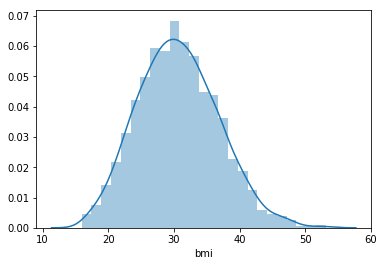

In [9]:
sns.distplot(Ins['bmi'])

###### As we see, bmi looks normally distributed.

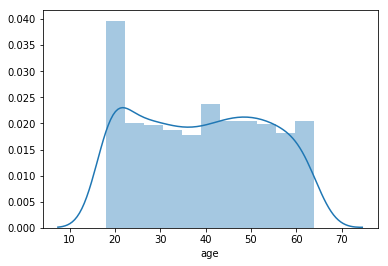

In [10]:
sns.distplot(Ins['age'])

###### Age looks like evenly spread out in the dataset except just one peak around 20. 

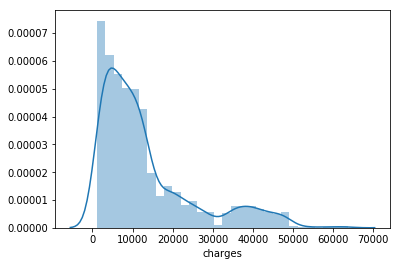

In [11]:
sns.distplot(Ins['charges'])

###### Charges are highly right skewed which also makes 2 kind of clusters or groups in the charges.  

### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns

In [12]:
stats.skew(Ins['bmi'])

0.28372857291709386

###### bmi is slightly positive skewed

In [13]:
stats.skew(Ins['age'])

0.055610083072599126

###### age is almost normally distributed as skewness is almost equal to zero.

In [14]:
stats.skew(Ins['charges'])

1.5141797118745743

###### 'charges' is highly right skewed  

### g. Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns 

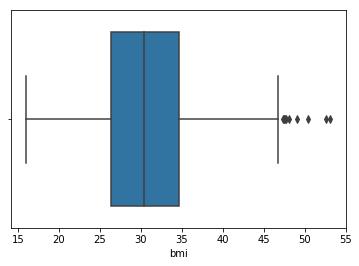

In [15]:
sns.boxplot(Ins['bmi'])

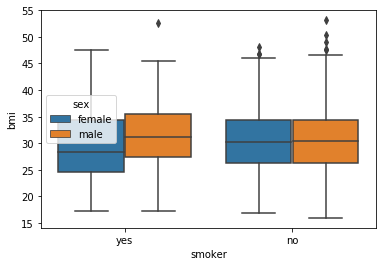

In [16]:
sns.boxplot(x=Ins['smoker'],y=Ins['bmi'],hue=Ins['sex'] )

###### bmi distribution looks normal with few outliers on higher end. Distribution is pretty simillar in male and female who doesnt smoke. But distribution is little right skewed in females who smoke. Surprisingly, most of the outliers (higher bmi) present in non smokers.

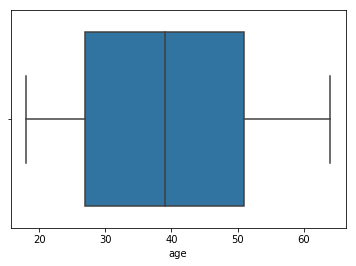

In [17]:
sns.boxplot(Ins['age'])

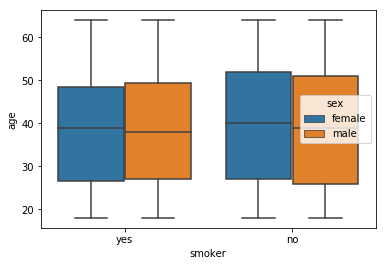

In [18]:
sns.boxplot(x=Ins['smoker'], y=Ins['age'], hue=Ins['sex'])

###### Age column doesnt have any outlier and normally distributed with high dispersion. Distribution is little right skewed in smoking females which infers that young females are more tend to smoke. 

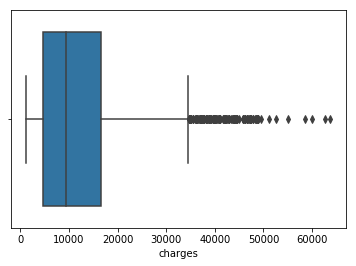

In [19]:
sns.boxplot(Ins['charges'])

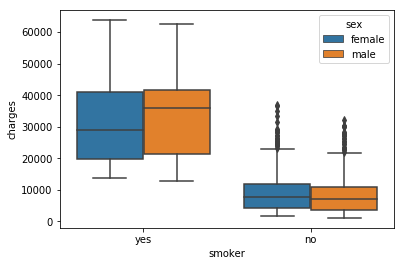

In [20]:
sns.boxplot(x=Ins['smoker'],y=Ins['charges'], hue=Ins['sex'])

###### Charges distribution is highly right skewed and has lots of outliers. All the outliers are from non smokers. Insurance charges vary highly between smokers and non smokers. 

### h. Distribution of categorical columns (include  children)  

Sex,smoker and region are categorical variables. Children can also be counted as discrete variable. Countplot can be used to plot frequency distribution or count in categorical variables.

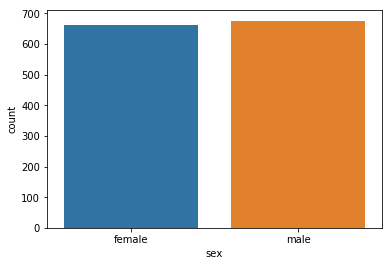

In [21]:
sns.countplot(Ins['sex'])

###### females and males are almost equally spreaded in the data

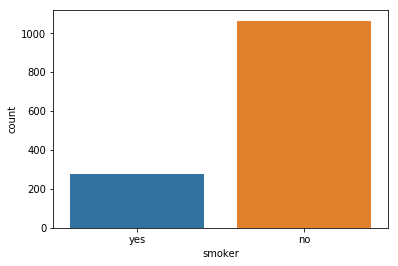

In [22]:
sns.countplot(Ins['smoker'])

###### There are ~300 smokers in ~1300 population 

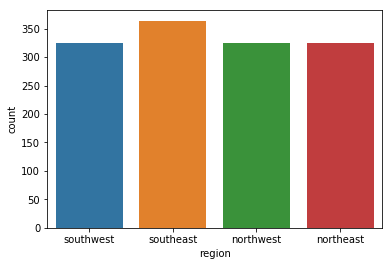

In [23]:
sns.countplot(Ins['region'])

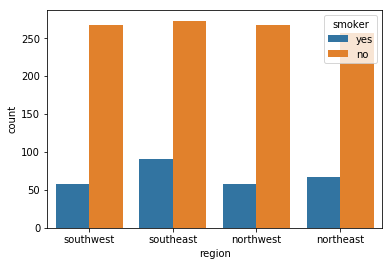

In [24]:
sns.countplot(Ins['region'], hue=Ins['smoker'])

###### Data is pretty much equally spreadout between the regions with little higher numbers from southeast. the below chart infers that the ratio of smokers vs nonsmokers is high in southeast region of United States. 

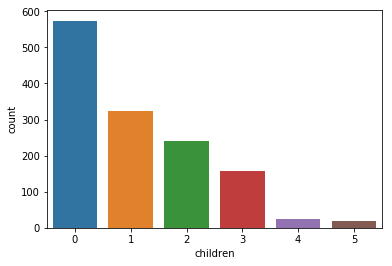

In [25]:
sns.countplot(Ins['children'])

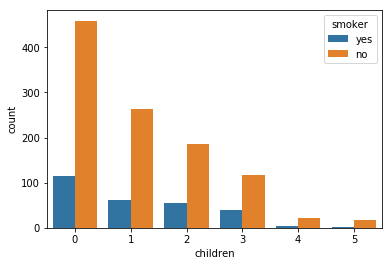

In [26]:
sns.countplot(Ins['children'], hue=Ins['smoker'])

###### Almost half of the population does not have any child. There is no sigificant ratio or association of smokers with no of children. 

### i. Pair plot that includes all the columns of the data  frame

To show pairplot of all the columns of the dataframe, we first need to encode categorical variables into integer using label encoder. Hence we need to encode sex,smoker and region into integer values. 

In [27]:
from sklearn import preprocessing
Ins['sex_num']=preprocessing.LabelEncoder.fit_transform(Ins['sex'], Ins['sex'])
Ins['smoker_num']=preprocessing.LabelEncoder.fit_transform(Ins['smoker'], Ins['smoker'])
Ins['region_num']=preprocessing.LabelEncoder.fit_transform(Ins['region'], Ins['region'])
Ins.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num,region_num
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


C:\Users\sjain1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sjain1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


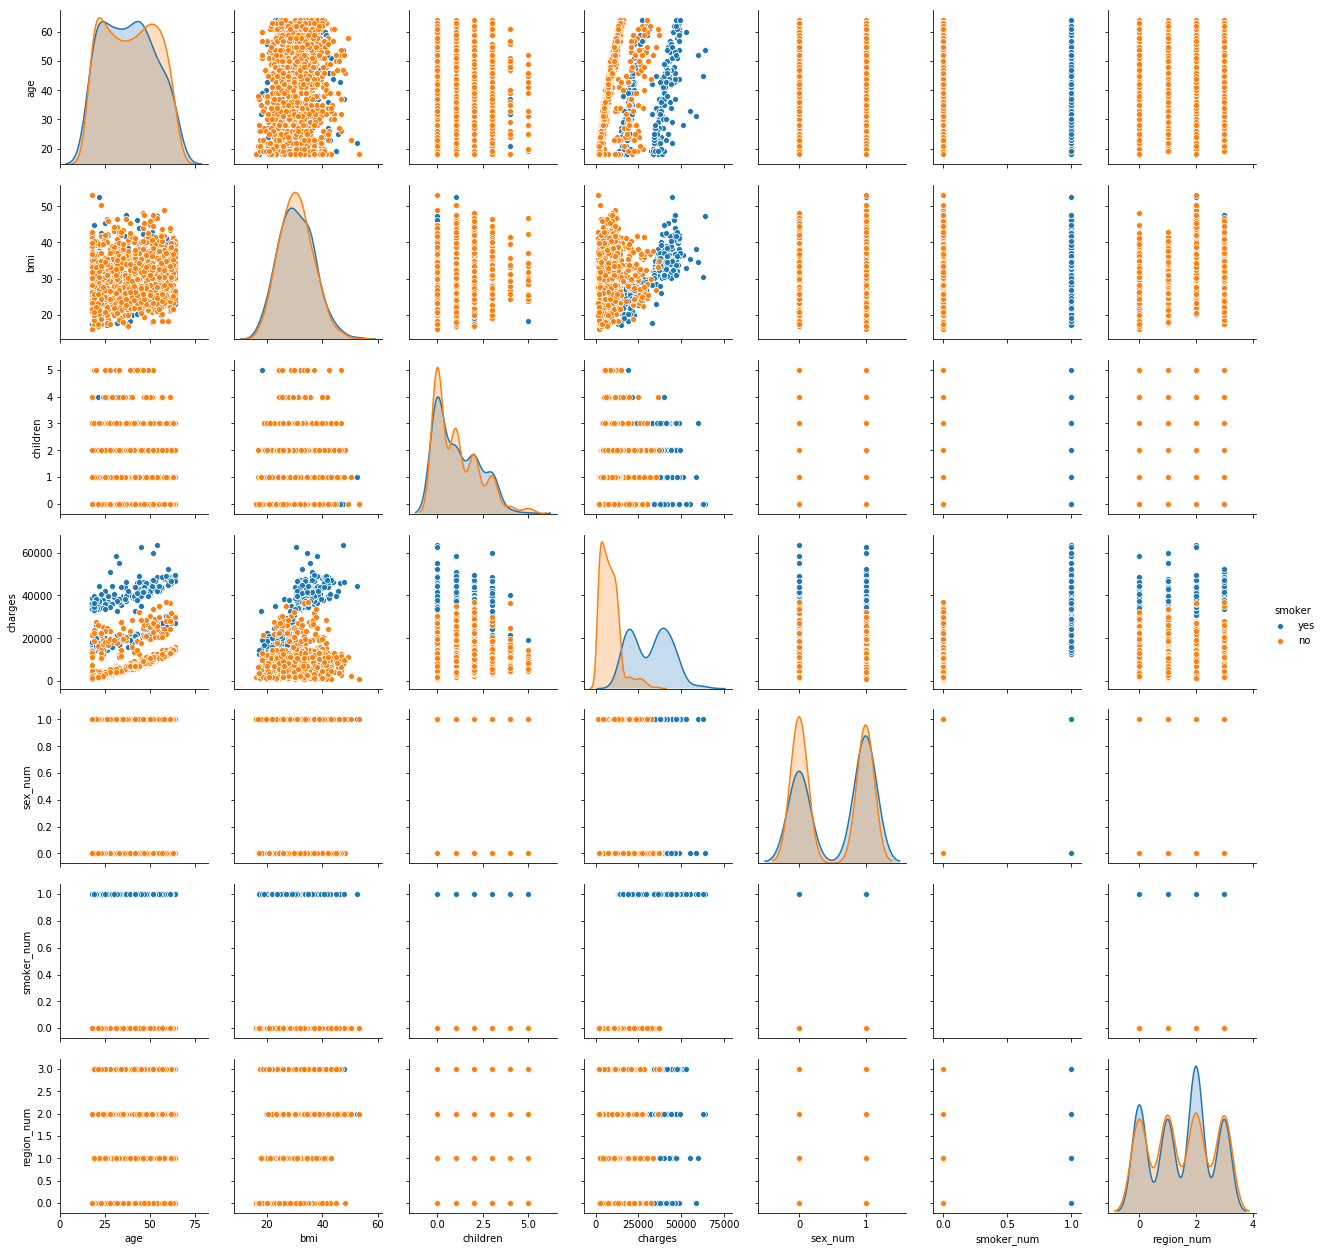

In [28]:
sns.pairplot(Ins, hue='smoker')

###### There is no correlation between bmi and age. That infers that people can be under weight or overweight at any time in their life. Charges are positively correlated to age and high for smokers. Charges doesnt get affected by BMI. 

### 4.a. Do charges of people who smoke differ significantly  from the people who don't? 

In [63]:
Charges_smokers = Ins[Ins['smoker']=='yes']['charges']
print('sample count for smokers:' ,Charges_smokers.count())

sample count for smokers: 274


In [30]:
Charges_nonsmokers = Ins[Ins['smoker']=='no']['charges']
print('sample count for nonsmokers:' ,Charges_nonsmokers.count())

sample count for nonsmokers: 1064


###### Step 1: Define null and alternative hypotheses

In testing whether the charges of people who smoke differ significantly from the people who don't, the null hypothesis states that there is no significant difference between the charges of somkers and non-smokers. The alternative hypthesis states that there is a significant difference in the charges for smokers and non-smokers.  

𝐻0: 𝜇S-𝜇NS = 0

𝐻𝐴: 𝜇S-𝜇NS ≠ 0


###### Step 2: Decide the significance level

Here we assume level of significance α= 0.05. Sample size of both the datasets are different and >30. Both the datasets are independent. 

###### Step 3: Identify the test statistic

We do not know the population standard deviation. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic.

###### Step 4: Calculate the p - value and test statistic

In [31]:
statistics,p_value = stats.ttest_ind(Charges_smokers,Charges_nonsmokers)

In [32]:
print('Statistic :', statistics , '\np_value :',p_value)

Statistic : 46.664921172723716 
p_value : 8.271435842177219e-283


###### Step 5: Decide to reject or accept null hypothesis

In this example, p value is 8.27e-283 and it is way less than 5% level of significance
So the statistical decision is to reject the null hypothesis at 5% level of significance.

###### Hence there is sufficient evidence to prove that  there is a significant difference in the charges for smokers and non-smokers.  

### 4.b. Does bmi of males differ significantly from that of females?  

In [64]:
Bmi_males = Ins[Ins['sex']=='male']['bmi']
print('sample count for males:' ,Bmi_males.count())

sample count for males: 676


In [34]:
Bmi_females = Ins[Ins['sex']=='female']['bmi']
print('sample count for females:' ,Bmi_females.count())

sample count for females: 662


###### Step 1: Define null and alternative hypotheses

In testing whether the bmi of males differ significantly from that of females, the null hypothesis states that there is no significant difference between these two. The alternative hypthesis states that there is a significant difference in the bmi of males and females.  

𝐻0: 𝜇M-𝜇F = 0

𝐻𝐴: 𝜇M-𝜇F ≠ 0


###### Step 2: Decide the significance level

Here we assume level of significance α= 0.05. Sample size of both the datasets are different and >30. Both the datasets are independent. 

###### Step 3: Identify the test statistic

We do not know the population standard deviation. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic.

###### Step 4: Calculate the p - value and test statistic

In [35]:
statistics,p_value = stats.ttest_ind(Bmi_males,Bmi_females)

In [36]:
print('Statistic :', statistics , '\np_value :',p_value)

Statistic : 1.696752635752224 
p_value : 0.08997637178984932


###### Step 5: Decide to reject or accept null hypothesis

In this example, p value is 8.99% and it is greater than 5% level of significance
So the statistical decision is to fail to reject the null hypothesis at 5% level of significance that means Null Hypothesis is true.

###### Hence there is no significant difference between bmi's of males and females.  

### 4.c. Is the proportion of smokers significantly different  in different genders?  

In [65]:
Smokers = Ins[Ins['smoker']=='yes']['sex']
print('Sample count for smokers:' ,Smokers.count())

Sample count for smokers: 274


In [58]:
print ("Distribution of smokers in different genders: \n" ,Smokers.value_counts())

Distribution of smokers in different genders: 
 male      159
female    115
Name: sex, dtype: int64


###### Step 1: Define null and alternative hypotheses

In testing whether the proprtion of smokers significantly different in different genders, 
the null hypothesis states that both two categorical variables (sex and smoker) are independent. 
The alternative hypthesis states that both the categorical variables are dependent.   

###### Step 2: Decide the significance level

Here we assume level of significance α= 0.05. Sample size of both the datasets are >30. 

###### Step 3: Identify the test statistic

Since it is to test the proportion of categorical variables, we will use Chi Square test. 

###### Step 4: Calculate the p - value and test statistic

In [59]:
chisq,p_value = chisquare(Smokers.value_counts())

In [61]:
print('Statistic :', chisq , '\np_value :',p_value)

Statistic : 7.065693430656935 
p_value : 0.007857389588994759


###### Step 5: Decide to reject or accept null hypothesis

In this example, p value is .78% which is less than 5% level of significance
So the statistical decision is to reject the null hypothesis at 5% level of significance that means Null Hypothesis is not true.

###### Hence both the categorical variables are dependent or proportion of smokers is significantly different in different genders.  

### 4.d. Is the distribution of bmi across women with no  children, one child and two children, the same ?  

In [84]:
#distribution of children across female
Ins[(Ins['sex']=='female')]['children'].value_counts()

0    289
1    158
2    119
3     77
4     11
5      8
Name: children, dtype: int64

In [93]:
Dist_bmi_female_012C= Ins[(Ins['sex']=='female') & ((Ins['children']==0)|(Ins['children']==1)|(Ins['children']==2))]
Dist_bmi_female_012C.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num,region_num
0,19,female,27.90,0,yes,southwest,16884.92400,0,1,3
5,31,female,25.74,0,no,southeast,3756.62160,0,0,2
6,46,female,33.44,1,no,southeast,8240.58960,0,0,2
9,60,female,25.84,0,no,northwest,28923.13692,0,0,1
11,62,female,26.29,0,yes,southeast,27808.72510,0,1,2


###### Step 1: Define null and alternative hypotheses

In testing whether the distribution of bmi across women with no children, one child and two children, the same, the null hypothesis states that there is no significant difference between these three. The alternative hypthesis states that mean of atleast one is different.  

𝐻0: 𝜇0=𝜇1=𝜇2

𝐻𝐴: at least one 𝜇 is different.


###### Step 2: Decide the significance level

Here we assume level of significance α= 0.05. Sample size of all the datasets are different and >30. 

###### Step 3: Identify the test statistic

Since we are comparing in 3 samples hence we will use ANOVA test.

###### Step 4: Calculate the p - value and test statistic

In [96]:
formula = 'bmi ~ C(children)'
model = ols(formula,Dist_bmi_female_012C).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3345
Date:                Sat, 24 Aug 2019   Prob (F-statistic):              0.716
Time:                        15:47:42   Log-Likelihood:                -1821.7
No. Observations:                 566   AIC:                             3649.
Df Residuals:                     563   BIC:                             3662.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           30.3615      0.357  

In [97]:
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq    mean_sq         F    PR(>F)
C(children)    2.0     24.590123  12.295062  0.334472  0.715858
Residual     563.0  20695.661583  36.759612       NaN       NaN


###### Step 5: Decide to reject or accept null hypothesis

In this example, p value is 71.5% which is greater than 5% level of significance
So the statistical decision is to fail to reject the null hypothesis at 5% level of significance that means Null Hypothesis is true.

###### Hence there is no significant difference between bmi's of the women.  The distribution of bmi across women with no children, one child and two children is the same.